In [1]:
%matplotlib inline
from pysal.lib import examples
from pysal.lib import io
from pysal.explore.giddy.directional import Rose
import numpy as np

/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
f = open(examples.get_path('spi_download.csv'), 'r')
lines = f.readlines()
f.close()


In [3]:
lines = [line.strip().split(",") for line in lines]
names = [line[2] for line in lines[1:-5]]
data = np.array([list(map(int, line[3:])) for line in lines[1:-5]])

In [4]:
sids  = list(range(60))
out = ['"United States 3/"',
      '"Alaska 3/"',
      '"District of Columbia"',
      '"Hawaii 3/"',
      '"New England"','"Mideast"',
       '"Great Lakes"',
       '"Plains"',
       '"Southeast"',
       '"Southwest"',
       '"Rocky Mountain"',
       '"Far West 3/"']

In [5]:
snames = [name for name in names if name not in out]
sids = [names.index(name) for name in snames]
states = data[sids,:]
us = data[0]
years = np.arange(1969, 2009)


In [6]:
rel = states/(us*1.)

In [7]:
gal = io.open(examples.get_path('states48.gal'))
w = gal.read()
w.transform = 'r'

In [8]:
Y = rel[:, [0, -1]] # first and last year

In [9]:
Y

array([[0.71272158, 0.83983287],
       [0.91110532, 0.85393454],
       [0.68196038, 0.80573518],
       [1.181439  , 1.08538102],
       [0.96115746, 1.06906586],
       [1.25677789, 1.39952248],
       [1.14859228, 1.00773478],
       [0.9535975 , 0.9765967 ],
       [0.82090719, 0.86781238],
       [0.85088634, 0.82257262],
       [1.12956204, 1.05319837],
       [0.9624609 , 0.86064962],
       [0.95542231, 0.93021289],
       [0.92674661, 0.96547951],
       [0.77267987, 0.79775169],
       [0.75234619, 0.90588938],
       [0.81803962, 0.90671011],
       [1.09462982, 1.20319339],
       [1.09098019, 1.27472145],
       [1.08107404, 0.86920513],
       [0.98409802, 1.07035913],
       [0.62643379, 0.75604357],
       [0.93039625, 0.9110376 ],
       [0.85870699, 0.86161958],
       [0.93091762, 0.97368683],
       [1.18091762, 1.02422404],
       [0.97627737, 1.08493335],
       [1.17309698, 1.277308  ],
       [0.76120959, 0.83142658],
       [1.19212722, 1.2125199 ],
       [0.

In [10]:
np.random.seed(100)
r4 = Rose(Y, w, k=4)

## Visualization

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7f017bbf8e48>)

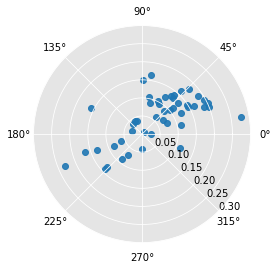

In [11]:
r4.plot()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7f0179b118d0>)

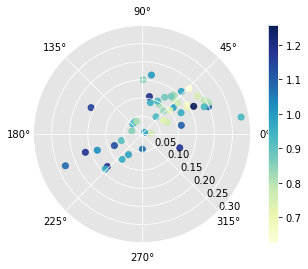

In [12]:
r4.plot(Y[:,0]) # condition on starting relative income

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7f017bbbd358>)

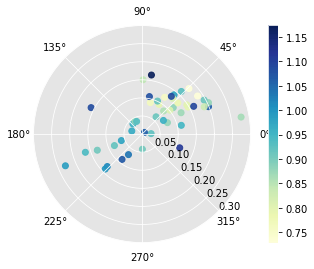

In [13]:
r4.plot(attribute=r4.lag[:,0]) # condition on the spatial lag of starting relative income

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f01799afd30>)

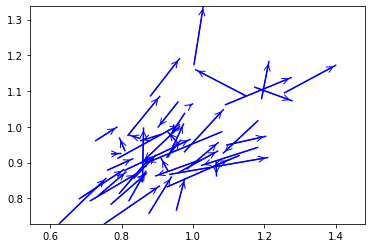

In [14]:
r4.plot_vectors() # lisa vectors

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0179846940>)

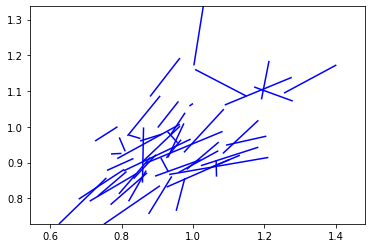

In [15]:
r4.plot_vectors(arrows=False)

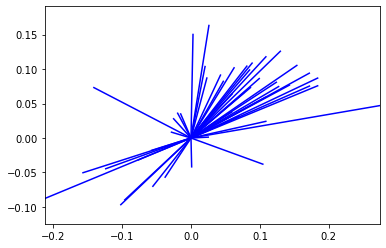

In [16]:
r4.plot_origin() # origin standardized



## Inference

In [17]:
r4.cuts

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

In [18]:
r4.counts

array([32,  5,  9,  2])

In [19]:
np.random.seed(1234)
r4.permute(permutations=999)

In [20]:
r4.p

array([0.028, 0.   , 0.002, 0.004])

In [21]:
r4.permute(alternative='positive', permutations=999)
r4.p

array([0.013, 0.001, 0.001, 0.013])

In [22]:
r4.expected_perm

array([27.24824825, 11.56556557,  2.43443443,  6.75175175])

In [23]:
r4.permute(alternative='negative', permutations=999)
r4.p

array([0.996, 1.   , 1.   , 0.996])